In [9]:
import numpy as np
import pandas as pd
import random

In [13]:
L = []
X = []
for i in range(10000):
    L.append(random.randint(1,6))   

In [14]:
S = pd.Series(L).value_counts()/pd.Series(L).value_counts().sum()

<Axes: >

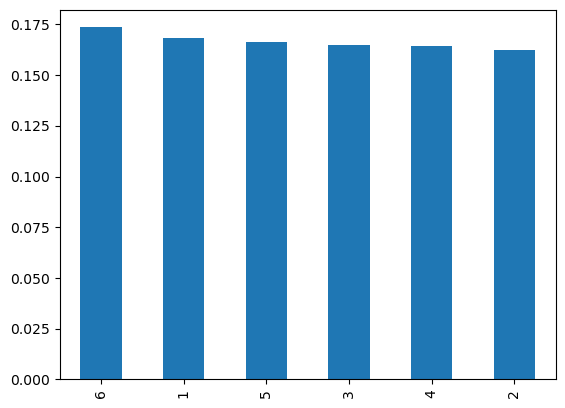

In [15]:
S.plot(kind='bar')

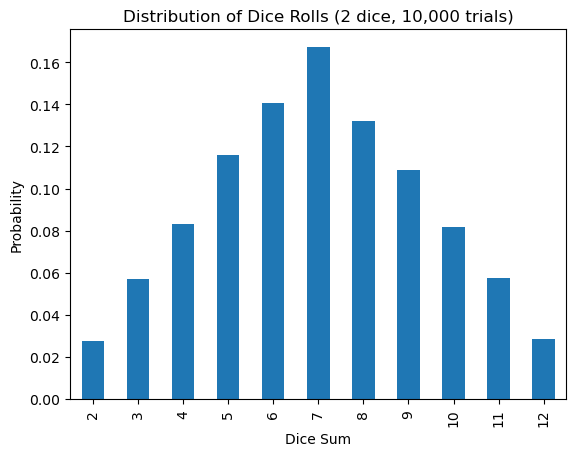

In [36]:
import random
import pandas as pd
import matplotlib.pyplot as plt

# Simulate dice rolls
X = []
for i in range(10000):
    a = random.randint(1, 6)
    b = random.randint(1, 6)
    X.append(a + b)   # store the sum

# Create frequency distribution
S = pd.Series(X).value_counts().sort_index()
S = S / S.sum()

# Plot
S.plot(kind='bar')
plt.xlabel("Dice Sum")
plt.ylabel("Probability")
plt.title("Distribution of Dice Rolls (2 dice, 10,000 trials)")
plt.show()

<Axes: >

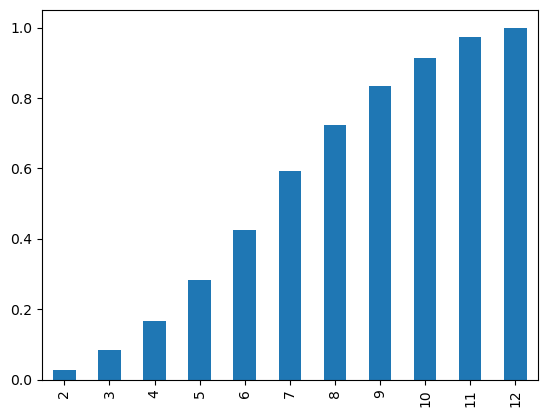

In [37]:
np.cumsum(S).plot(kind='bar')

In [38]:
# Parametric Density Estimation

In [39]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import normal

sample = normal(loc=50, scale=5,size=1000)

In [40]:
sample.mean()

np.float64(50.15118429398889)

(array([ 12.,  35.,  95., 189., 262., 229., 123.,  45.,   7.,   3.]),
 array([34.75602276, 38.07384693, 41.39167111, 44.70949528, 48.02731945,
        51.34514362, 54.66296779, 57.98079197, 61.29861614, 64.61644031,
        67.93426448]),
 <BarContainer object of 10 artists>)

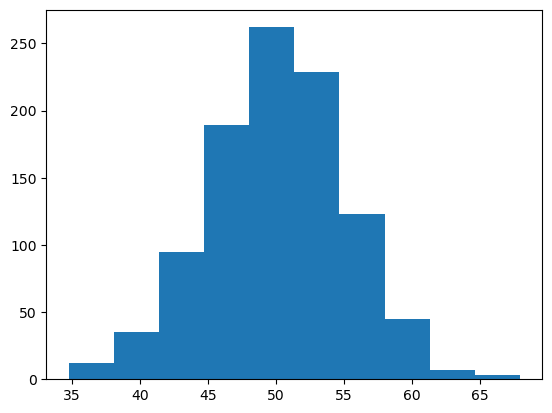

In [41]:
# plot histogram to understand the distribution of data
plt.hist(sample,bins=10)

In [42]:
# calculate sample mean and sample std dev
sample_mean = sample.mean()
sample_std = sample.std()

In [43]:
# fit the distribution with the above parameters

from scipy.stats import norm
dist = norm(60, 12)

In [44]:
values = np.linspace(sample.min(),sample.max(),100)

In [45]:
sample.max()

np.float64(67.93426448168192)

In [46]:
probabilities = [dist.pdf(value) for value in values]

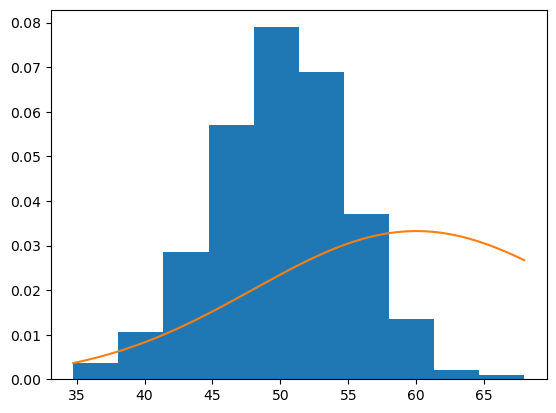

In [47]:
# plot the histogram and pdf
plt.hist(sample,bins=10,density=True)
plt.plot(values,probabilities)

<Axes: ylabel='Count'>

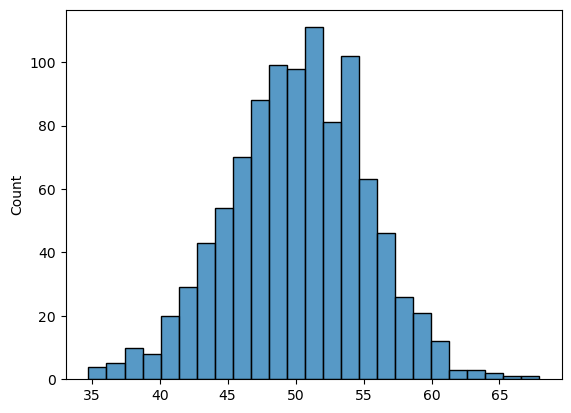

In [49]:
import seaborn as sns
sns.histplot(sample)

In [50]:
# KDE


In [51]:
# generate a sample
sample1 = normal(loc=20, scale=5, size=300)
sample2 = normal(loc=40, scale=5, size=700)
sample = np.hstack((sample1, sample2))

(array([ 1.,  2.,  2.,  2.,  3.,  4.,  8., 13.,  7., 17., 23., 19., 25.,
        33., 21., 24., 17., 15., 17., 11.,  6., 17., 12.,  9.,  9., 20.,
        18., 39., 25., 37., 39., 47., 35., 47., 57., 48., 46., 47., 43.,
        40., 24., 25., 18.,  8.,  7.,  2.,  4.,  1.,  5.,  1.]),
 array([ 6.76240931,  7.72872052,  8.69503173,  9.66134294, 10.62765415,
        11.59396536, 12.56027657, 13.52658778, 14.49289899, 15.4592102 ,
        16.42552141, 17.39183262, 18.35814383, 19.32445504, 20.29076625,
        21.25707746, 22.22338867, 23.18969988, 24.15601109, 25.1223223 ,
        26.08863351, 27.05494472, 28.02125593, 28.98756714, 29.95387835,
        30.92018956, 31.88650077, 32.85281198, 33.81912319, 34.7854344 ,
        35.75174561, 36.71805682, 37.68436803, 38.65067924, 39.61699045,
        40.58330166, 41.54961287, 42.51592408, 43.48223529, 44.4485465 ,
        45.41485771, 46.38116892, 47.34748013, 48.31379134, 49.28010255,
        50.24641376, 51.21272497, 52.17903618, 53.14534739,

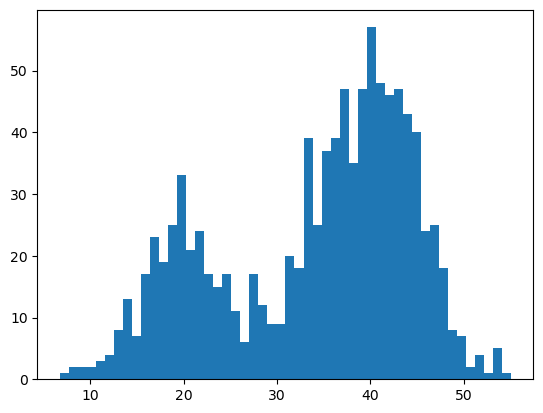

In [52]:
# plot histogram bins=50
plt.hist(sample,bins=50)

In [53]:
from sklearn.neighbors import KernelDensity

model = KernelDensity(bandwidth=5, kernel='gaussian')

# convert data to a 2D array
sample = sample.reshape((len(sample), 1))

model.fit(sample)

KernelDensity(bandwidth=5)

In [54]:
values = np.linspace(sample.min(),sample.max(),100)
values = values.reshape((len(values), 1))

In [55]:
probabilities = model.score_samples(values)
probabilities = np.exp(probabilities)

In [56]:
`score_samples(values)` returns the log-density estimate of the input samples values. This is because the `score_samples()` method of the KernelDensity class returns the logarithm of the probability density estimate rather than the actual probability density estimate.

SyntaxError: invalid syntax (3280512670.py, line 1)

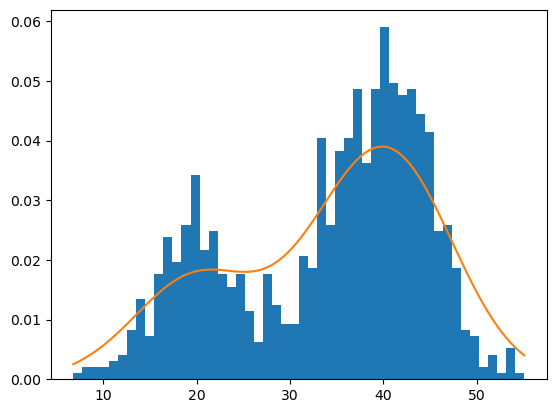

In [57]:
plt.hist(sample, bins=50, density=True)
plt.plot(values[:], probabilities)
plt.show()

<Axes: ylabel='Density'>

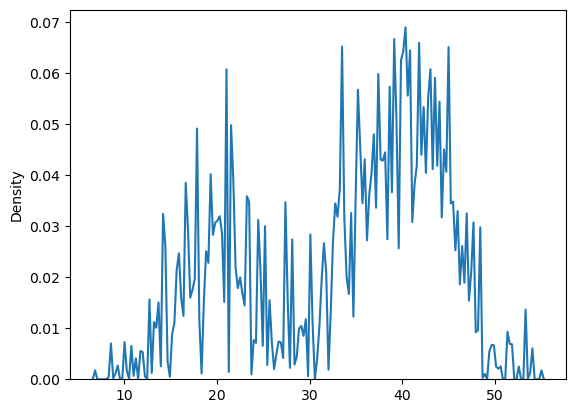

In [58]:
sns.kdeplot(sample.reshape(1000),bw_adjust=0.02)

In [59]:
import seaborn as sns

In [60]:
df = sns.load_dataset('iris')

<Axes: xlabel='sepal_length', ylabel='Density'>

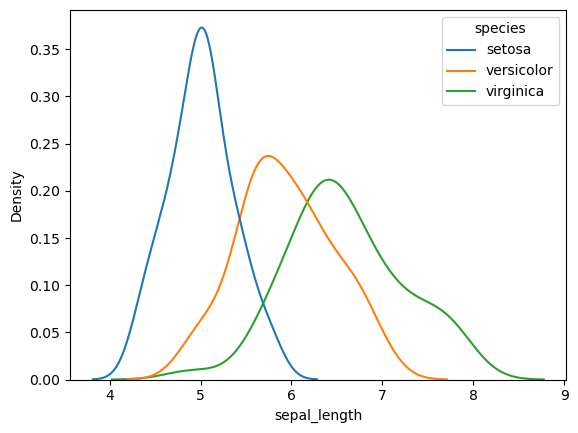

In [61]:
sns.kdeplot(data=df,x='sepal_length',hue='species')

<Axes: xlabel='sepal_width', ylabel='Density'>

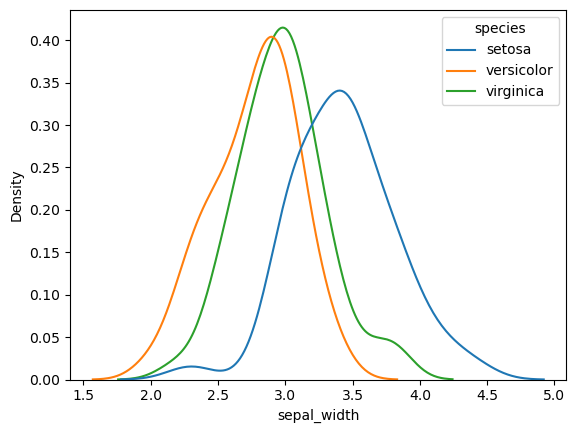

In [62]:
sns.kdeplot(data=df,x='sepal_width',hue='species')

<Axes: xlabel='petal_length', ylabel='Density'>

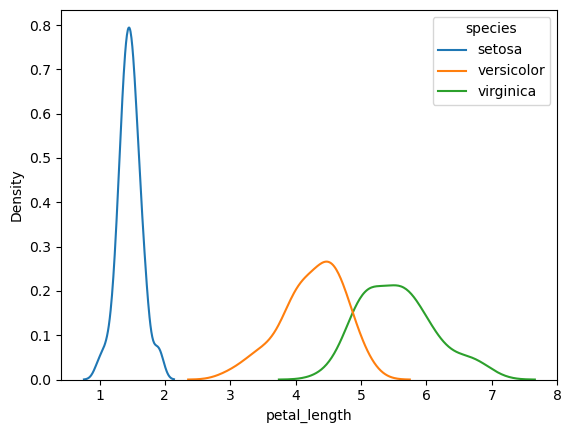

In [63]:
sns.kdeplot(data=df,x='petal_length',hue='species')

<Axes: xlabel='petal_width', ylabel='Density'>

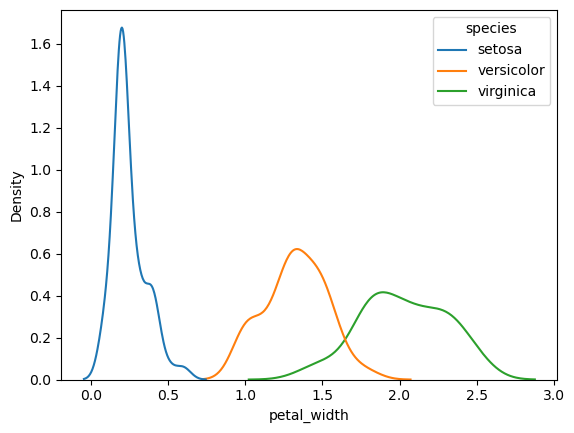

In [64]:
sns.kdeplot(data=df,x='petal_width',hue='species')

<Axes: xlabel='petal_width', ylabel='Density'>

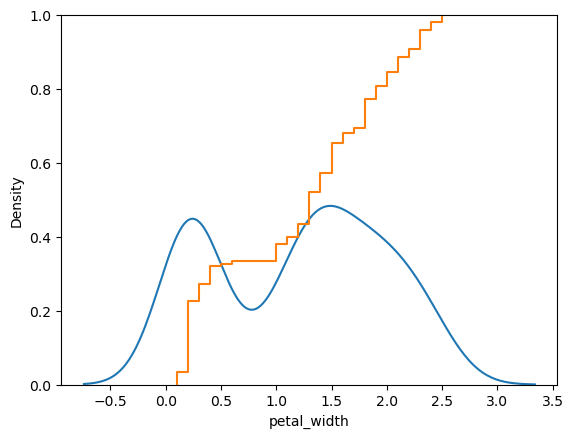

In [67]:
sns.kdeplot(df['petal_width'])
sns.ecdfplot(data=df,x='petal_width')

In [68]:
titanic = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

In [69]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: xlabel='Age', ylabel='Density'>

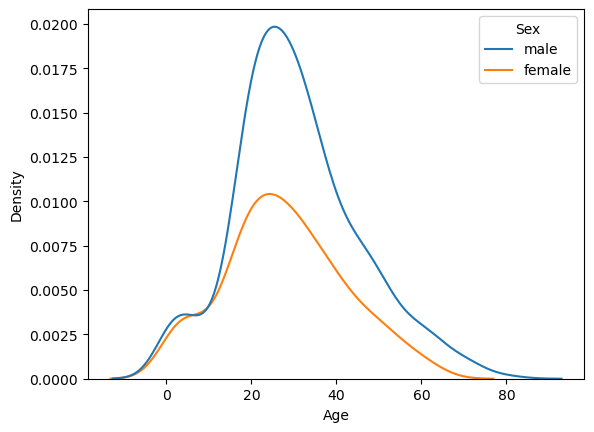

In [70]:
# code here
sns.kdeplot(data=titanic,x='Age',hue='Sex')

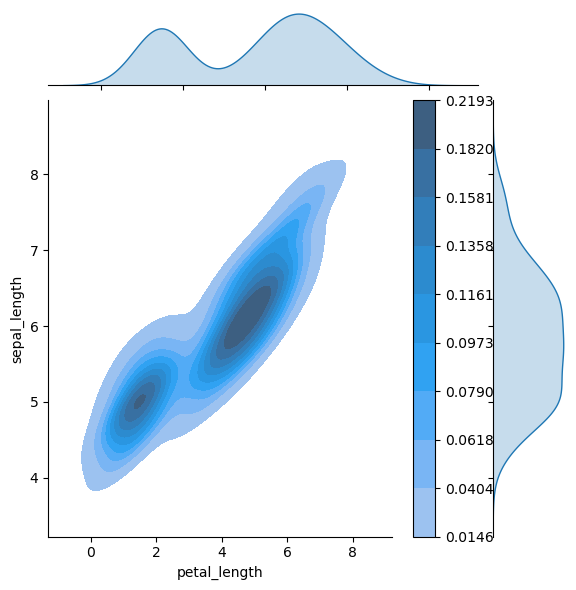

In [71]:
 sns.jointplot(data=df, x="petal_length", y="sepal_length", kind="kde",fill=True,cbar=True)

<Axes: xlabel='Age', ylabel='Density'>

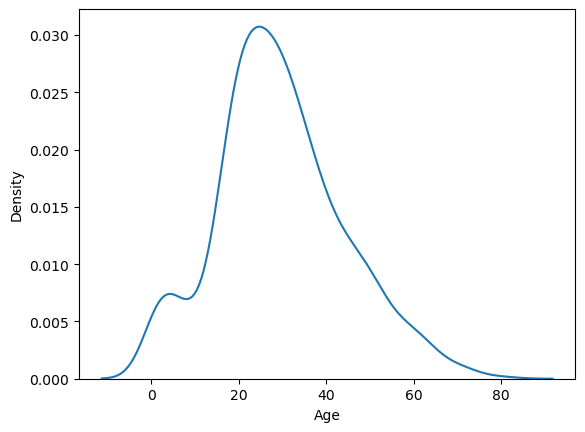

In [72]:
sns.kdeplot(titanic['Age'])

<Axes: xlabel='Age', ylabel='Density'>

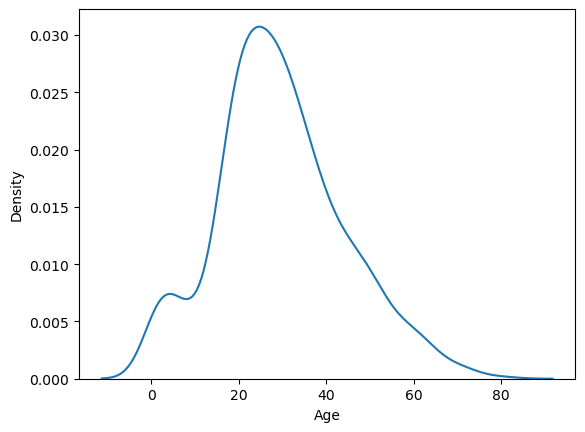

In [73]:
sns.kdeplot(titanic['Age'])


In [74]:
titanic['Age'].mean()

np.float64(29.69911764705882)

In [75]:
x = (titanic['Age'] - titanic['Age'].mean())/titanic['Age'].std()

<Axes: xlabel='Age', ylabel='Density'>

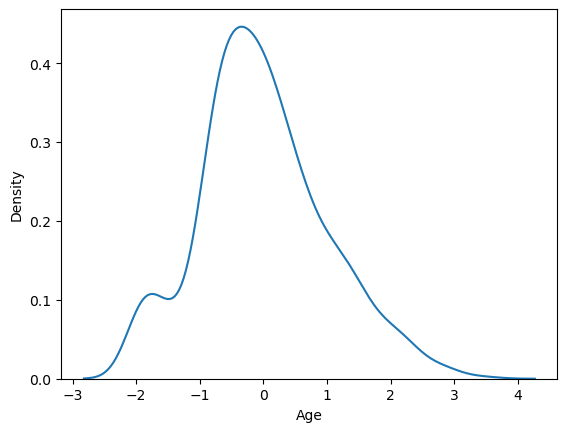

In [76]:
sns.kdeplot(x)

In [77]:
x.mean()

np.float64(2.388378943731429e-16)

In [78]:
x.std()

0.9999999999999994

In [79]:
titanic['Age'].mean() + 3*titanic['Age'].std()

np.float64(73.27860964406095)

In [80]:
titanic[titanic['Age'] > 73]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.000,A23,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.775,NaN,S
